### Importing Libraries
### Importing Data
### Checking for PII Data
### Comparing Customer Behavior in Geographic Regions
### Creating Sample Data of High Active Customers
### Creating Customer Profiles on Age, Income, Certain goods in the “department_id” column, and Number of dependents.
### Aggregation on the max, mean, and min of Customer-profile levels for Usage Frequency and Expenditure
### Comparing Customer Profiles with Regions and Departments
### Extra Graphs Created for Project Analysis

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Dataframe

In [3]:
# Path Creation
path=r'C:\Users\Drew\Instacart Basket Analysis'

In [148]:
# Importing Data
ords_prods_cust_merge=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_merge.pkl'))

In [151]:
ords_prods_cust_merge.columns.tolist()

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'spending_average',
 'type_of_spender',
 'user_frequency',
 'customer_frequency_type',
 'first_name',
 'last_name',
 'gender',
 'state',
 'age',
 'date_joined',
 'num_of_dependants',
 'marital_status',
 'income',
 '_merge']

# 2.Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [6]:
ords_prods_cust_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,num_of_dependants,marital_status,income,_merge
0,33664,2 % Reduced Fat Milk,84,16,9.9,183964,873,3,0,10,...,Edward,Carr,Male,Colorado,64,2/28/2019,3,married,290220,both
1,33664,2 % Reduced Fat Milk,84,16,9.9,1851256,873,4,6,12,...,Edward,Carr,Male,Colorado,64,2/28/2019,3,married,290220,both
2,33664,2 % Reduced Fat Milk,84,16,9.9,1915696,1893,1,5,17,...,Christine,Le,Female,Colorado,23,8/27/2019,3,married,348829,both
3,33664,2 % Reduced Fat Milk,84,16,9.9,2763293,1893,2,4,16,...,Christine,Le,Female,Colorado,23,8/27/2019,3,married,348829,both
4,33664,2 % Reduced Fat Milk,84,16,9.9,2564805,1893,4,1,17,...,Christine,Le,Female,Colorado,23,8/27/2019,3,married,348829,both


### The main PII implication I find are the columns related to the first name and last name of customers. This is something I would bring up with my supervisor to get confirmation if removal is necessary. For the task assignment, I will leave it. But, in the workplace for safety and if needed to decide quickly, I would consider removal to be safe.

# 3.Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
### Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
### Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [190]:
# Creating Northeast Region List
Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [191]:
# Creating Midwest Region List
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [192]:
# Creating South Region List
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [193]:
# Creating West Region List
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [194]:
# Creating Region Column for Northeast region
ords_prods_cust_merge.loc[ords_prods_cust_merge['state'].isin(Northeast),'region']='Northeast'

In [195]:
# Creating Region Column for Midwest Region
ords_prods_cust_merge.loc[ords_prods_cust_merge['state'].isin(Midwest),'region']='Midwest'

In [196]:
# Creating Region Column for South Region
ords_prods_cust_merge.loc[ords_prods_cust_merge['state'].isin(South),'region']='South'

In [197]:
# Creating Region Column for West Region
ords_prods_cust_merge.loc[ords_prods_cust_merge['state'].isin(West),'region']='West'

In [15]:
# Checking Newly Created Region Column
ords_prods_cust_merge.head(20)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,last_name,gender,state,age,date_joined,num_of_dependants,marital_status,income,_merge,region
0,33664,2 % Reduced Fat Milk,84,16,9.9,183964,873,3,0,10,...,Carr,Male,Colorado,64,2/28/2019,3,married,290220,both,West
1,33664,2 % Reduced Fat Milk,84,16,9.9,1851256,873,4,6,12,...,Carr,Male,Colorado,64,2/28/2019,3,married,290220,both,West
2,33664,2 % Reduced Fat Milk,84,16,9.9,1915696,1893,1,5,17,...,Le,Female,Colorado,23,8/27/2019,3,married,348829,both,West
3,33664,2 % Reduced Fat Milk,84,16,9.9,2763293,1893,2,4,16,...,Le,Female,Colorado,23,8/27/2019,3,married,348829,both,West
4,33664,2 % Reduced Fat Milk,84,16,9.9,2564805,1893,4,1,17,...,Le,Female,Colorado,23,8/27/2019,3,married,348829,both,West
5,33664,2 % Reduced Fat Milk,84,16,9.9,949012,3339,1,1,14,...,Quinn,Male,New Hampshire,67,1/29/2018,0,divorced/widowed,152761,both,Northeast
6,33664,2 % Reduced Fat Milk,84,16,9.9,420057,3339,2,0,11,...,Quinn,Male,New Hampshire,67,1/29/2018,0,divorced/widowed,152761,both,Northeast
7,33664,2 % Reduced Fat Milk,84,16,9.9,1511997,3339,3,1,18,...,Quinn,Male,New Hampshire,67,1/29/2018,0,divorced/widowed,152761,both,Northeast
8,33664,2 % Reduced Fat Milk,84,16,9.9,1153448,3339,4,4,16,...,Quinn,Male,New Hampshire,67,1/29/2018,0,divorced/widowed,152761,both,Northeast
9,33664,2 % Reduced Fat Milk,84,16,9.9,2669259,3339,5,4,14,...,Quinn,Male,New Hampshire,67,1/29/2018,0,divorced/widowed,152761,both,Northeast


In [16]:
ords_prods_cust_merge['region'].value_counts(dropna=False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

### Determining spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [17]:
# Creating Crosstab between region and type_of_spend Columns
region_spender_crosstab=pd.crosstab(ords_prods_cust_merge['region'],ords_prods_cust_merge['type_of_spender'],dropna=False)

In [18]:
region_spender_crosstab

type_of_spender,High Spender,Low Spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40564,10751321
West,31223,8261690


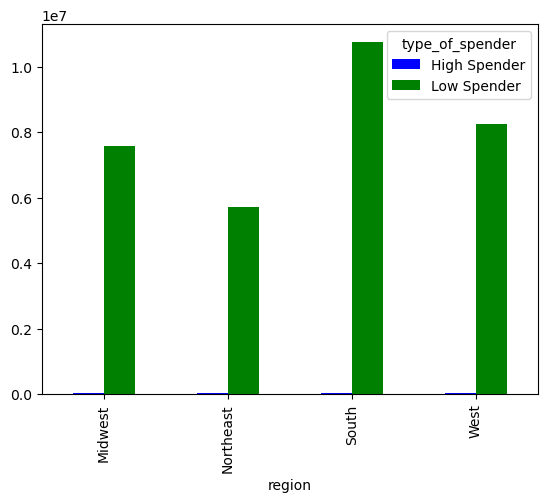

In [19]:
# Bar Chart of region_spender_crosstab Data
# Blue selected against green as green helps the blue to be more easily seen
bar_region_spender=region_spender_crosstab.plot.bar(color=['blue','green'])

### All regions show low spenders to account for their majority showing a trend of low spending habits across all regions. 
### South region shows to have the highest overall numbers of low spenders and high spenders compared to other regions.
### Northeast region shows to have the least number of low spenders and high spenders compared to other regions. 

In [20]:
# Exporting Bar Chart
bar_region_spender.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_spending_bar.png'))

# 4.Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [21]:
# Creating Exclusion Flag Column for High-Activity Customers
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order']>=5,'customer_activity_flag']='High Activity'

In [22]:
# Creating Exclusion Flag Column for Low-Activity Customers
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order']<5,'customer_activity_flag']='Low Activity'

In [23]:
# New customer_activity_flag column check
ords_prods_cust_merge.head(20)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,num_of_dependants,marital_status,income,_merge,region,customer_activity_flag
0,33664,2 % Reduced Fat Milk,84,16,9.9,183964,873,3,0,10,...,Male,Colorado,64,2/28/2019,3,married,290220,both,West,High Activity
1,33664,2 % Reduced Fat Milk,84,16,9.9,1851256,873,4,6,12,...,Male,Colorado,64,2/28/2019,3,married,290220,both,West,High Activity
2,33664,2 % Reduced Fat Milk,84,16,9.9,1915696,1893,1,5,17,...,Female,Colorado,23,8/27/2019,3,married,348829,both,West,High Activity
3,33664,2 % Reduced Fat Milk,84,16,9.9,2763293,1893,2,4,16,...,Female,Colorado,23,8/27/2019,3,married,348829,both,West,High Activity
4,33664,2 % Reduced Fat Milk,84,16,9.9,2564805,1893,4,1,17,...,Female,Colorado,23,8/27/2019,3,married,348829,both,West,High Activity
5,33664,2 % Reduced Fat Milk,84,16,9.9,949012,3339,1,1,14,...,Male,New Hampshire,67,1/29/2018,0,divorced/widowed,152761,both,Northeast,High Activity
6,33664,2 % Reduced Fat Milk,84,16,9.9,420057,3339,2,0,11,...,Male,New Hampshire,67,1/29/2018,0,divorced/widowed,152761,both,Northeast,High Activity
7,33664,2 % Reduced Fat Milk,84,16,9.9,1511997,3339,3,1,18,...,Male,New Hampshire,67,1/29/2018,0,divorced/widowed,152761,both,Northeast,High Activity
8,33664,2 % Reduced Fat Milk,84,16,9.9,1153448,3339,4,4,16,...,Male,New Hampshire,67,1/29/2018,0,divorced/widowed,152761,both,Northeast,High Activity
9,33664,2 % Reduced Fat Milk,84,16,9.9,2669259,3339,5,4,14,...,Male,New Hampshire,67,1/29/2018,0,divorced/widowed,152761,both,Northeast,High Activity


In [24]:
# Checking frequency variables of new customer activity flag column
ords_prods_cust_merge['customer_activity_flag'].value_counts(dropna=False)

customer_activity_flag
High Activity    30964564
Low Activity      1440295
Name: count, dtype: int64

In [25]:
# Creating Separate Dataframe for only High-Activity Customers
ords_prods_cust_high_activity=ords_prods_cust_merge[ords_prods_cust_merge['customer_activity_flag']=='High Activity']

In [26]:
# Check new dataframe of only high activity customers
ords_prods_cust_high_activity.shape

(30964564, 35)

In [27]:
# Exporting New Dataframe of only high activity customers
ords_prods_cust_high_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_high_activity.pkl'))

In [28]:
# Exporting Updated Dataframe for customer flag column of both low and high activity customers
ords_prods_cust_merge.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_activity.pkl'))

## (Questions:5 & 6) 
## 5.Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)
## 6.Create an appropriate visualization to show the distribution of profiles.

In [29]:
ords_prods_cust_merge.shape

(32404859, 35)

### Profiling Based on Age

In [30]:
ords_prods_cust_merge['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

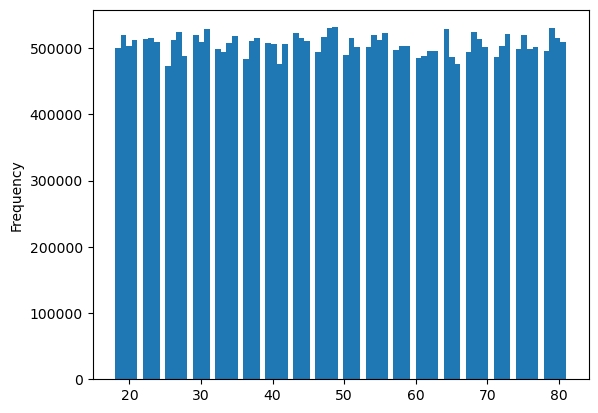

In [31]:
ords_prods_cust_merge['age'].plot.hist(bins=81)

In [210]:
# Creating Young Adult age group 
ords_prods_cust_merge.loc[ords_prods_cust_merge['age']<=30,'age_group']='Young Adult'

In [211]:
# Creating Middle-Age Adult age group
ords_prods_cust_merge.loc[(ords_prods_cust_merge['age']>30)&(ords_prods_cust_merge['age']<=60),'age_group']='Middle-Age Adult'

In [212]:
# Creating Senior age group
ords_prods_cust_merge.loc[ords_prods_cust_merge['age']>60,'age_group']='Senior'

In [213]:
ords_prods_cust_merge['age_group'].value_counts(dropna=False)

age_group
Middle-Age Adult    15222661
Senior              10582839
Young Adult          6599359
Name: count, dtype: int64

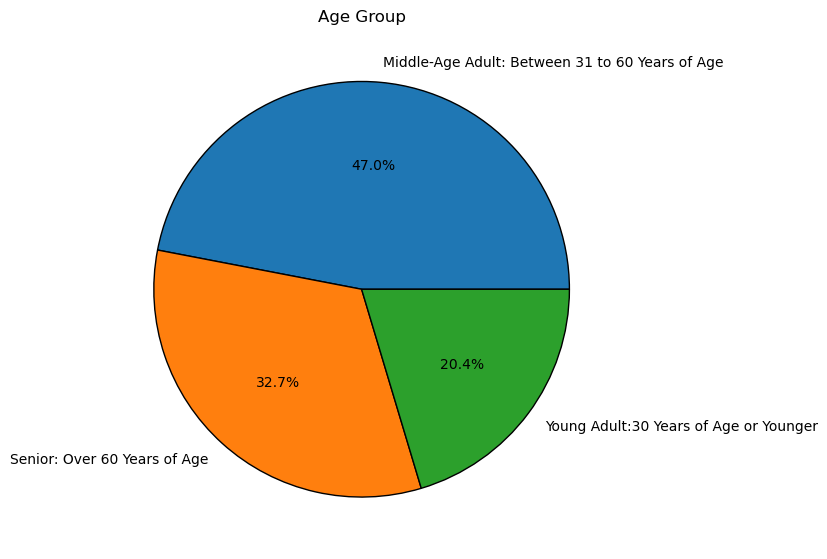

In [232]:
# Creating Pie Chart of Age Groups
age_group_counts = ords_prods_cust_merge['age_group'].value_counts()
plt.figure(figsize=(8,8))
age_group_pie_chart=age_group_counts.plot.pie(labels=('Middle-Age Adult: Between 31 to 60 Years of Age','Senior: Over 60 Years of Age','Young Adult:30 Years of Age or Younger'), 
                          autopct='%.1f%%',
                          wedgeprops={'edgecolor':'black'})
plt.title('Age Group')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [233]:
# Exporting Age Group Pie Chart Visualizations
age_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_distribution_pie_chart.png'))

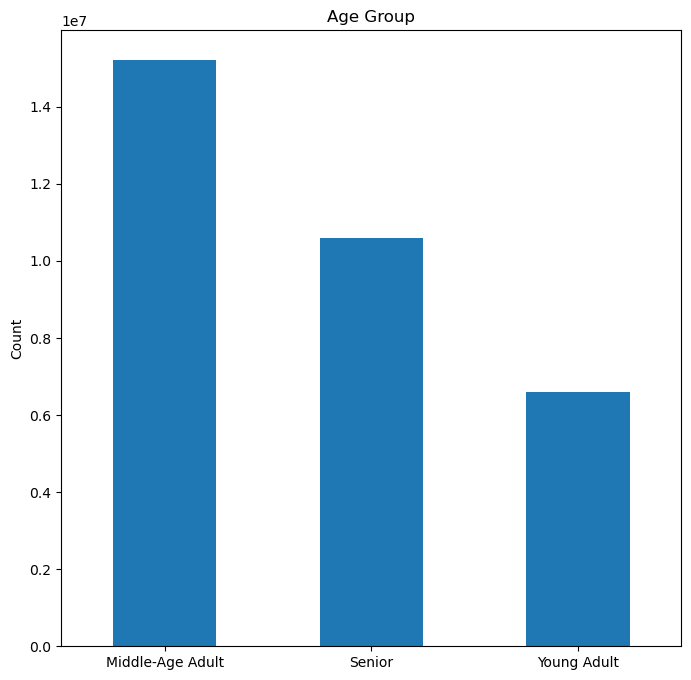

In [38]:
# Creating Bar Chart of Age Groups
age_group_counts = ords_prods_cust_merge['age_group'].value_counts()
plt.figure(figsize=(8,8))
age_group_bar=age_group_counts.plot.bar(rot=0)
plt.title('Age Group')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout
plt.show()


In [39]:
# Exporting Age Group Bar Chart
age_group_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_distribution_bar_chart.png'))

### Profile Based on Income

<Axes: ylabel='Frequency'>

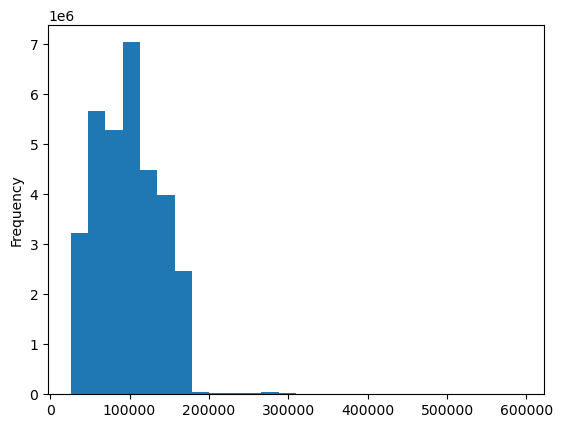

In [40]:
ords_prods_cust_merge['income'].plot.hist(bins=26)

In [41]:
ords_prods_cust_merge['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [42]:
# Creating Low Income group 
ords_prods_cust_merge.loc[ords_prods_cust_merge['income']<=65000,'income_group']='Low Income'

In [43]:
# Creating Middle Income group
ords_prods_cust_merge.loc[(ords_prods_cust_merge['income']>65000)&(ords_prods_cust_merge['income']<=130000),'income_group']='Middle Income'

In [44]:
# Creating High Income group
ords_prods_cust_merge.loc[ords_prods_cust_merge['income']>130000,'income_group']='High Income'

In [45]:
ords_prods_cust_merge['income_group'].value_counts(dropna=False)

income_group
Middle Income    17170138
High Income       7713528
Low Income        7521193
Name: count, dtype: int64

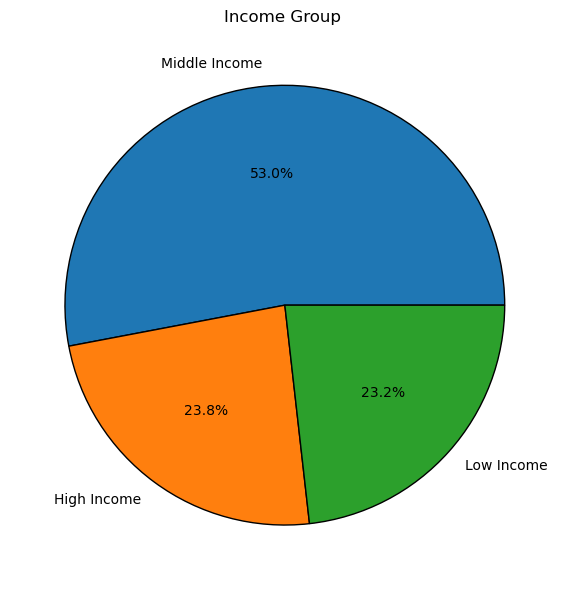

In [46]:
# Creating Pie Chart of Income Groups
income_group_counts = ords_prods_cust_merge['income_group'].value_counts()
plt.figure(figsize=(6,6))
income_group_pie_chart=income_group_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Income Group ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [47]:
# Exporting Income Group Pie Chart
income_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_group_distribution_pie.png'))

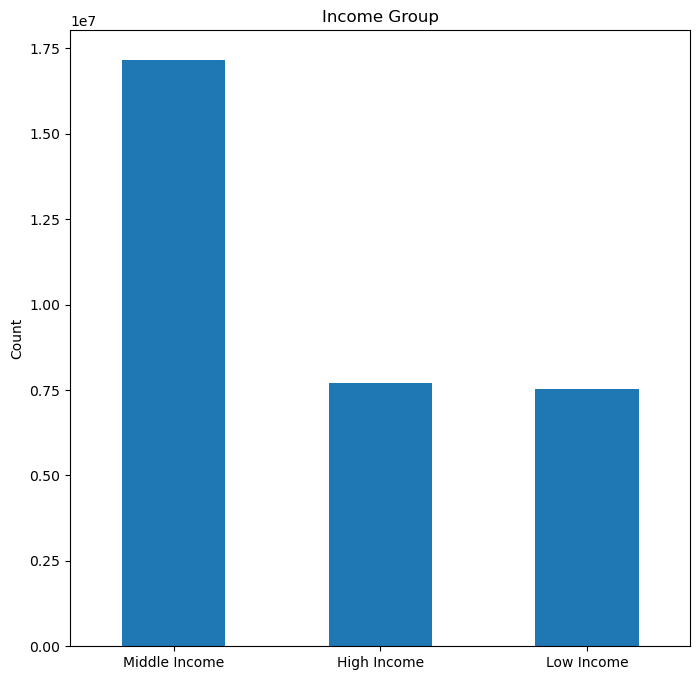

In [48]:
# Creating Bar Chart of Income Groups
income_group_counts = ords_prods_cust_merge['income_group'].value_counts()
plt.figure(figsize=(8,8))
income_group_bar=income_group_counts.plot.bar(rot=0)
plt.title('Income Group')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout
plt.show()

In [49]:
income_group_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_group_distribution_bar.png'))

### Profile Number of Dependants

In [50]:
ords_prods_cust_merge['num_of_dependants'].describe()

count    3.240486e+07
mean     1.501896e+00
std      1.118865e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: num_of_dependants, dtype: float64

In [51]:
# Creating Small dependant group 
ords_prods_cust_merge.loc[ords_prods_cust_merge['num_of_dependants']<=1,'dependant_size']='Small'

In [52]:
# Creating Medium dependants group
ords_prods_cust_merge.loc[ords_prods_cust_merge['num_of_dependants']==2,'dependant_size']='Medium'

In [53]:
# Creating Large dependants group
ords_prods_cust_merge.loc[ords_prods_cust_merge['num_of_dependants']>=3,'dependant_size']='Large'

In [54]:
ords_prods_cust_merge['dependant_size'].value_counts(dropna=False)

dependant_size
Small     16178607
Large      8135109
Medium     8091143
Name: count, dtype: int64

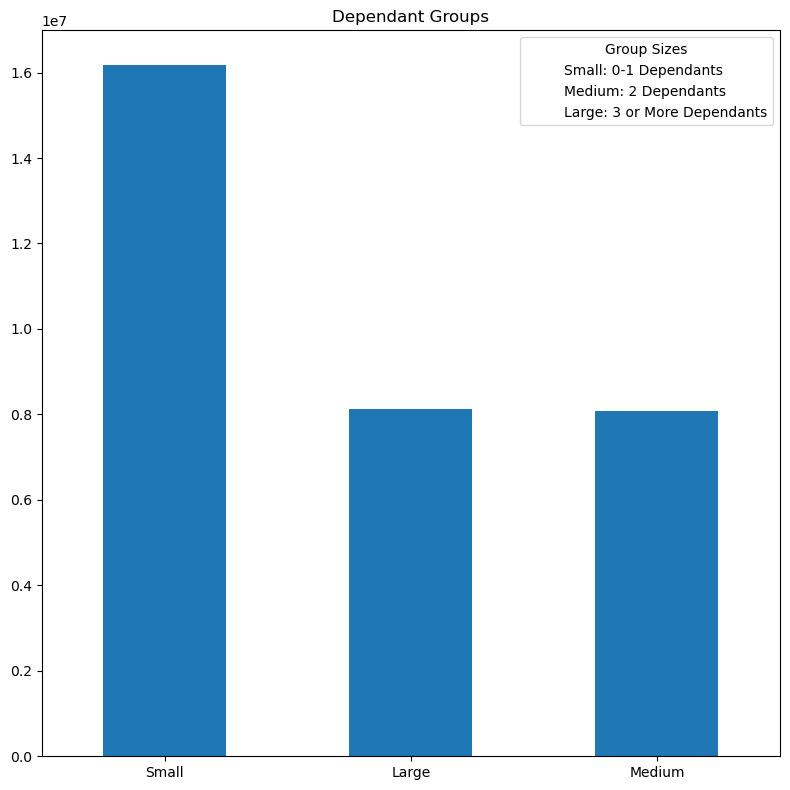

In [55]:
# Creating Bar Chart of Age Groups
import matplotlib.patches as mpatches
dependants_group_counts = ords_prods_cust_merge['dependant_size'].value_counts()
plt.figure(figsize=(8,8))
dependant_group_bar=dependants_group_counts.plot.bar(rot=0)
plt.title('Dependant Groups')
plt.xlabel('')
plt.ylabel('')

# Create proxy artists for the legend
small_patch = mpatches.Patch(color='none',label='Small: 0-1 Dependants')
medium_patch = mpatches.Patch(color='none',label='Medium: 2 Dependants')
large_patch = mpatches.Patch(color='none',label='Large: 3 or More Dependants')

# Add the custom legend
plt.legend(handles=[small_patch, medium_patch, large_patch], title='Group Sizes')

plt.tight_layout()
plt.show()

In [56]:
# Exporting Dependant Group Bar Chart
dependant_group_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependant_group_bar.png'))

### Profile orders_day_of_week

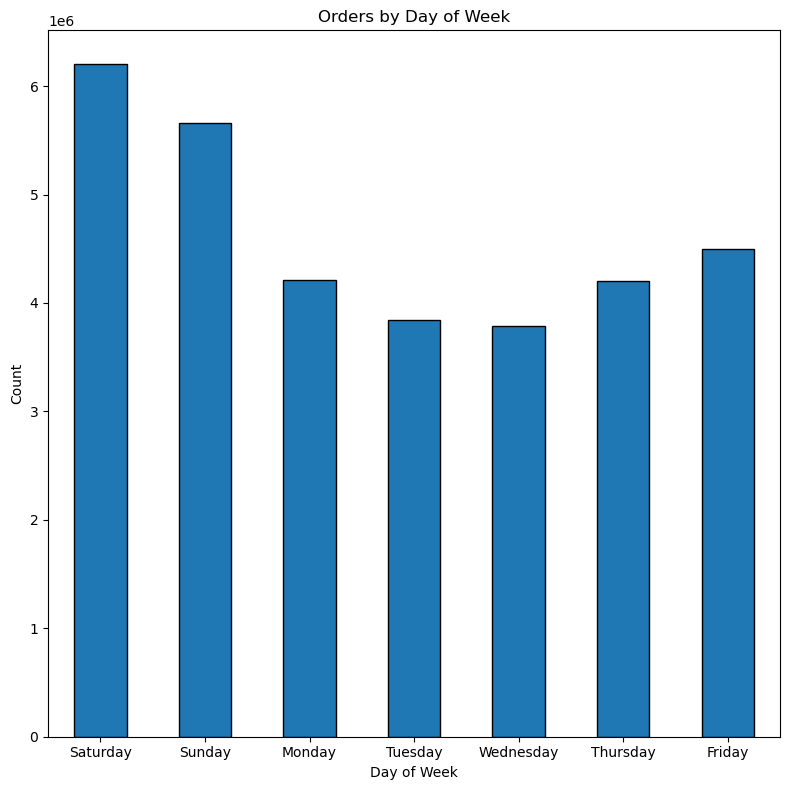

In [57]:
# Creating reference day names
day_names = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Creating Bar Chart
plt.figure(figsize=(8, 8))
ords_day_by_week = ords_prods_cust_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(edgecolor='black', rot=0)
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=[day_names[i] for i in range(7)])
plt.tight_layout()
plt.show()

In [58]:
# Exporting Order by Day of Week Bar Chart
ords_day_by_week.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','ords_day_by_week.png'))

In [59]:
ords_prods_cust_merge['orders_day_of_week'].describe()

count    3.240486e+07
mean     2.738867e+00
std      2.090077e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: orders_day_of_week, dtype: float64

In [60]:
# Creating weekend flag
ords_prods_cust_merge.loc[ords_prods_cust_merge['orders_day_of_week'].isin([0,1]),'week_day_category']='Weekend'

In [61]:
# Creating weekday flag
ords_prods_cust_merge.loc[ords_prods_cust_merge['orders_day_of_week'].isin([2,3,4,5,6]),'week_day_category']='Weekday'

In [62]:
# Checking new column week_day_category frequency
ords_prods_cust_merge['week_day_category'].value_counts(dropna=False)

week_day_category
Weekday    20540447
Weekend    11864412
Name: count, dtype: int64

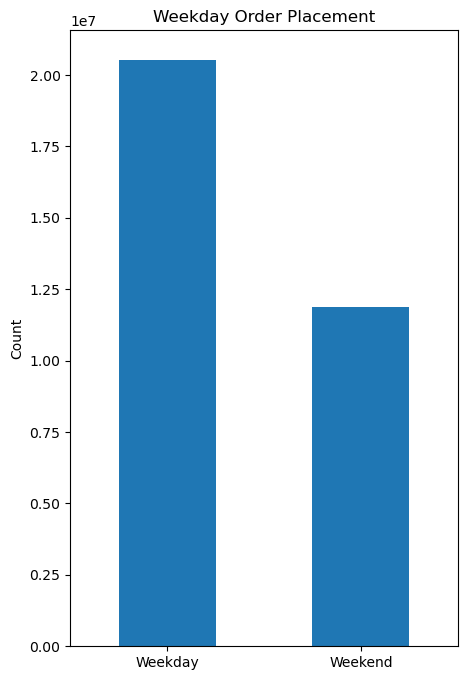

In [63]:
# Creating Bar Chart of Weekday Order Groups
week_day_count = ords_prods_cust_merge['week_day_category'].value_counts()
plt.figure(figsize=(5,8))
week_day_order_count_bar=week_day_count.plot.bar(rot=0)
plt.title('Weekday Order Placement')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout
plt.show()

In [64]:
# Exporting Weekday Order PLacement Bar Chart
week_day_order_count_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','week_day_order_placement_comparison_bar.png'))

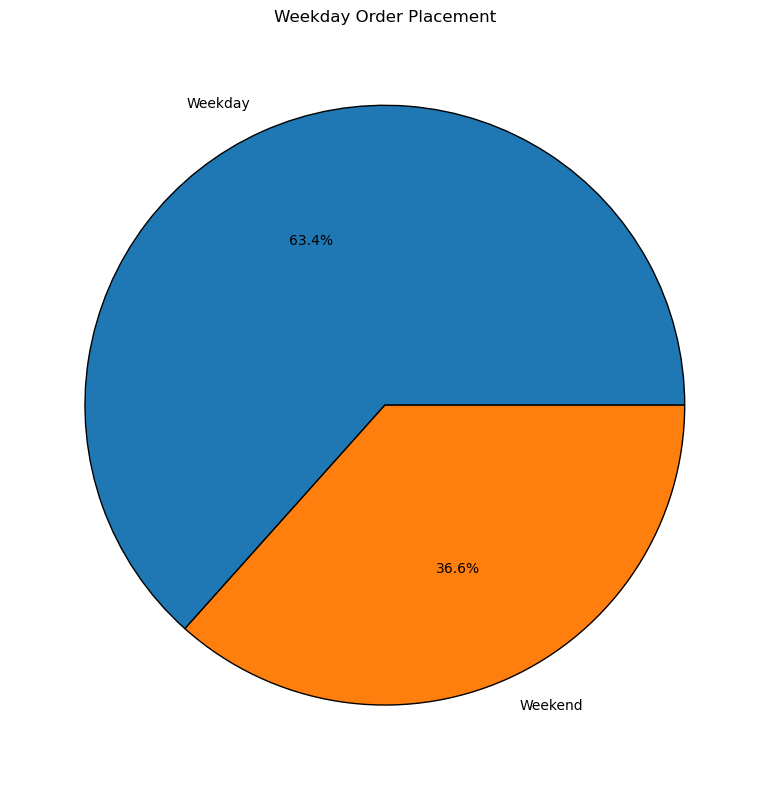

In [65]:
# Creating Pie Chart of Weekday Order Groups
week_day_count = ords_prods_cust_merge['week_day_category'].value_counts()
plt.figure(figsize=(8,8))
week_day_order_count_pie=week_day_count.plot.pie(autopct='%.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Weekday Order Placement')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [66]:
# Exporting Weekdday Order Placement Pie Chart
week_day_order_count_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','week_day_order_placement_comparison_pie.png'))

### Profile order_hour_of_day

In [67]:
ords_prods_cust_merge['order_hour_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

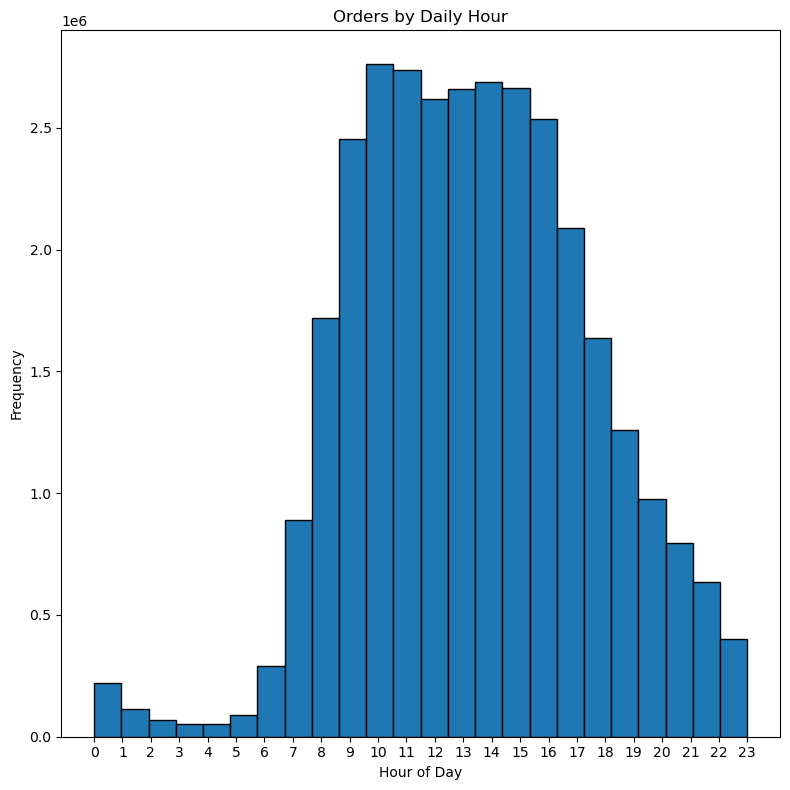

In [68]:
plt.figure(figsize=(8, 8))
ords_hour_by_day=ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins=24, edgecolor='black')
plt.title('Orders by Daily Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [69]:
ords_hour_by_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','ords_hour_by_day_hist.png'))

In [70]:
# Creating morning order group 
ords_prods_cust_merge.loc[ords_prods_cust_merge['order_hour_of_day']<12,'order_hour_group']='Morning'

In [71]:
# Creating Middle Income group
ords_prods_cust_merge.loc[(ords_prods_cust_merge['order_hour_of_day']>=12)&(ords_prods_cust_merge['order_hour_of_day']<=17),'order_hour_group']='Afternoon'

In [72]:
# Creating Evening order group 
ords_prods_cust_merge.loc[ords_prods_cust_merge['order_hour_of_day']>17,'order_hour_group']='Evening'

In [73]:
# Checking frequency of new column order_hour_group
ords_prods_cust_merge['order_hour_group'].value_counts(dropna=False)

order_hour_group
Afternoon    15253622
Morning      11448096
Evening       5703141
Name: count, dtype: int64

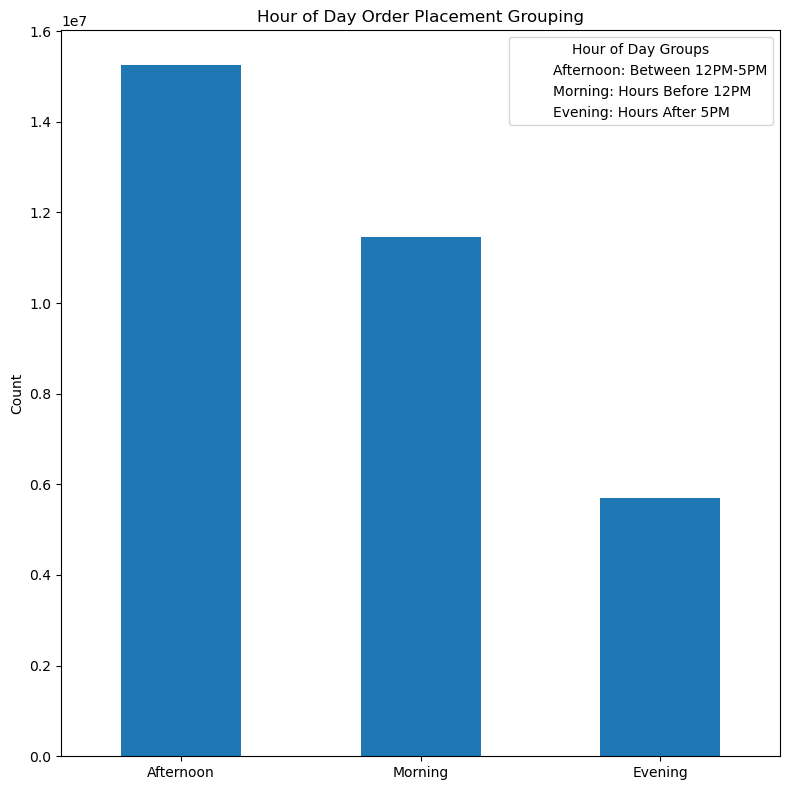

In [74]:
# Creating Bar Chart of Hour Grouping Orders
order_hour_group_count = ords_prods_cust_merge['order_hour_group'].value_counts()
plt.figure(figsize=(8,8))
order_hour_group_count_bar=order_hour_group_count.plot.bar(rot=0)
plt.title('Hour of Day Order Placement Grouping')
plt.xlabel('')
plt.ylabel('Count')

# Create proxy artists for the legend
small_patch = mpatches.Patch(color='none',label='Afternoon: Between 12PM-5PM')
medium_patch = mpatches.Patch(color='none',label='Morning: Hours Before 12PM')
large_patch = mpatches.Patch(color='none',label='Evening: Hours After 5PM')

# Add the custom legend
plt.legend(handles=[small_patch, medium_patch, large_patch], title='Hour of Day Groups')

plt.tight_layout()
plt.show()
plt.tight_layout
plt.show()

In [75]:
order_hour_group_count_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_hour_group_comparison_bar.png'))

# 7.Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [76]:
ords_prods_cust_merge.columns.tolist()

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'spending_average',
 'type_of_spender',
 'user_frequency',
 'customer_frequency_type',
 'first_name',
 'last_name',
 'gender',
 'state',
 'age',
 'date_joined',
 'num_of_dependants',
 'marital_status',
 'income',
 '_merge',
 'region',
 'customer_activity_flag',
 'age_group',
 'income_group',
 'dependant_size',
 'week_day_category',
 'order_hour_group']

In [77]:
# Creating aggregation subset of customer profile
cust_profile_agg=ords_prods_cust_merge.groupby(['user_id','order_number','days_since_prior_order','loyalty_flag','type_of_spender','customer_frequency_type','state','region','customer_activity_flag','age_group','income','income_group','marital_status','dependant_size','week_day_category','orders_day_of_week','order_hour_group','order_hour_of_day'])['prices'].sum().reset_index()

In [78]:
cust_profile_agg.head()

,user_id,order_number,days_since_prior_order,loyalty_flag,type_of_spender,customer_frequency_type,state,region,customer_activity_flag,age_group,income,income_group,marital_status,dependant_size,week_day_category,orders_day_of_week,order_hour_group,order_hour_of_day,prices
0,1,2,15.0,New Customer,Low Spender,Non-frequent Customer,Alabama,South,High Activity,Middle-Age Adult,40423,Low Income,married,Large,Weekday,3,Morning,7,35.4
1,1,3,21.0,New Customer,Low Spender,Non-frequent Customer,Alabama,South,High Activity,Middle-Age Adult,40423,Low Income,married,Large,Weekday,3,Afternoon,12,28.2
2,1,4,29.0,New Customer,Low Spender,Non-frequent Customer,Alabama,South,High Activity,Middle-Age Adult,40423,Low Income,married,Large,Weekday,4,Morning,7,26.0
3,1,5,28.0,New Customer,Low Spender,Non-frequent Customer,Alabama,South,High Activity,Middle-Age Adult,40423,Low Income,married,Large,Weekday,4,Afternoon,15,57.0
4,1,6,19.0,New Customer,Low Spender,Non-frequent Customer,Alabama,South,High Activity,Middle-Age Adult,40423,Low Income,married,Large,Weekday,2,Morning,7,25.0


In [79]:
cust_profile_agg.dtypes

user_id                     object
order_number                 int64
days_since_prior_order     float64
loyalty_flag                object
type_of_spender             object
customer_frequency_type     object
state                       object
region                      object
customer_activity_flag      object
age_group                   object
income                       int64
income_group                object
marital_status              object
dependant_size              object
week_day_category           object
orders_day_of_week           int64
order_hour_group            object
order_hour_of_day            int64
prices                     float64
dtype: object

In [80]:
# Creating subset of user focused breakdown
user_agg=cust_profile_agg.groupby('user_id').agg({'order_number': ['mean', 'min', 'max'],'days_since_prior_order': ['mean', 'min', 'max'],
                                        'orders_day_of_week': ['mean', 'min', 'max'],'order_hour_of_day': ['mean', 'min', 'max'],
                                        'prices': ['mean', 'min', 'max'],'income':['mean','min','max']})

In [81]:
user_agg

order_number         days_since_prior_order              \
                mean min max                   mean   min   max   
user_id                                                           
1                6.0   2  10              19.555556   0.0  30.0   
10               3.5   2   5              19.750000  12.0  30.0   
100              3.5   2   5              26.000000  18.0  30.0   
1000             4.5   2   7              12.166667   5.0  30.0   
10000           37.0   2  72               4.507042   0.0  17.0   
...              ...  ..  ..                    ...   ...   ...   
99995            3.5   2   5              18.000000   6.0  30.0   
99996            7.0   2  12              22.181818  15.0  30.0   
99997            2.5   2   3              22.000000  14.0  30.0   
99998            3.5   2   5               8.750000   7.0  12.0   
99999           18.0   2  34               6.969697   1.0  24.0   

        orders_day_of_week         order_hour_of_day              prices  \
                      mean min max              mean min max        mean   
user_id                                                                    
1                 2.555556   1   4         10.555556   7  16   38.233333   
10                4.000000   3   5         17.250000  15  20  299.500000   
100               2.250000   0   5         17.500000  15  20   60.700000   
1000              2.833333   0   6         16.833333  14  18  122.916667   
10000             2.760563   0   6         11.380282   5  22  121.188732   
...                    ...  ..  ..               ...  ..  ..         ...   
99995             3.250000   0   6         13.000000  12  14   88.825000   
99996             2.272727   1   5         10.545455   8  13   78.118182   
99997             2.000000   2   2         13.500000  12  15   70.500000   
99998             2.250000   1   6         12.000000   9  17   42.325000   
99999             2.454545   0   6         14.606061   7  23   70.118182   

                         income                  
           min    max      mean     min     max  
user_id                                          
1         25.0   63.1   40423.0   40423   40423  
10       240.0  429.6   52716.0   52716   52716  
100       28.2   97.6  138741.0  138741  138741  
1000     112.9  134.4   63581.0   63581   63581  
10000     11.8  298.2   61257.0   61257   61257  
...        ...    ...       ...     ...     ...  
99995     42.9  132.5   92882.0   92882   92882  
99996      2.8  127.1  107293.0  107293  107293  
99997     31.6  109.4   71271.0   71271   71271  
99998     20.9   51.2   98951.0   98951   98951  
99999      6.7  159.7   55497.0   55497   55497  

[206208 rows x 18 columns]

In [82]:
# Creating aggregation by age_group for days_since_prior_order & prices
age_group_agg=cust_profile_agg.groupby('age_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [83]:
age_group_agg

days_since_prior_order                prices             
                                   mean  min   max       mean  min     max
age_group                                                                 
Middle-Age Adult              10.693267  0.0  30.0  78.503371  1.0  1092.2
Senior                        10.702699  0.0  30.0  78.362987  1.0   875.0
Young Adult                   10.746529  0.0  30.0  78.901487  1.0   842.1

In [84]:
# Creating aggregation by income_group for days_since_prior_order & prices
income_group_agg=cust_profile_agg.groupby('income_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [85]:
income_group_agg

days_since_prior_order                prices             
                                mean  min   max       mean  min     max
income_group                                                           
High Income                10.514026  0.0  30.0  83.701068  1.0  1047.4
Low Income                 11.165659  0.0  30.0  63.847101  1.0   875.0
Middle Income              10.555562  0.0  30.0  83.855117  1.0  1092.2

In [86]:
# Creating aggregation by dependant_size group for days_since_prior_order & prices dependant_size
dependant_size_agg=cust_profile_agg.groupby('dependant_size').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [87]:
dependant_size_agg

days_since_prior_order                prices             
                                 mean  min   max       mean  min     max
dependant_size                                                          
Large                       10.680234  0.0  30.0  78.519957  1.0  1092.2
Medium                      10.736552  0.0  30.0  78.646799  1.0   846.1
Small                       10.706005  0.0  30.0  78.492839  1.0   875.0

In [88]:
# Creating aggregation by week_day_category group for days_since_prior_order & prices
week_day_category_agg=cust_profile_agg.groupby('week_day_category').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [89]:
week_day_category_agg

days_since_prior_order                prices             
                                    mean  min   max       mean  min     max
week_day_category                                                          
Weekday                        10.479112  0.0  30.0  76.093368  1.0  1092.2
Weekend                        11.138152  0.0  30.0  83.158802  1.0   842.1

In [90]:
# Creating aggregation by order_hour_group for days_since_prior_order & prices
order_hour_group_agg=cust_profile_agg.groupby('order_hour_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [91]:
order_hour_group_agg

days_since_prior_order                prices             
                                   mean  min   max       mean  min     max
order_hour_group                                                          
Afternoon                     10.836544  0.0  30.0  78.299916  1.0  1047.4
Evening                       10.587939  0.0  30.0  78.168442  1.0   875.0
Morning                       10.593427  0.0  30.0  79.042359  1.0  1092.2

In [92]:
ords_prods_cust_merge.describe()

,prices,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,spending_average,user_frequency,age,num_of_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,7.790180e+00,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,8.352547e+00,5.895873e-01,3.305217e+01,7.790180e+00,1.039776e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,4.242122e+00,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,7.127071e+00,4.919087e-01,2.515525e+01,7.348080e-01,7.131754e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,4.200000e+00,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.377778e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,7.400000e+00,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.811236e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,1.130000e+01,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.228655e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,2.500000e+01,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,2.320000e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


# 8.Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [93]:
# Creating crosstab to compare age_group profile with region locations
age_region_comparison=pd.crosstab(ords_prods_cust_merge['age_group'],ords_prods_cust_merge['region'],dropna=False)

In [94]:
age_region_comparison

region,Midwest,Northeast,South,West
age_group,,,,
Middle-Age Adult,3601775,2666903,5046936,3907047
Senior,2465259,1894192,3518088,2705300
Young Adult,1530291,1161641,2226861,1680566


<Figure size 1000x700 with 0 Axes>

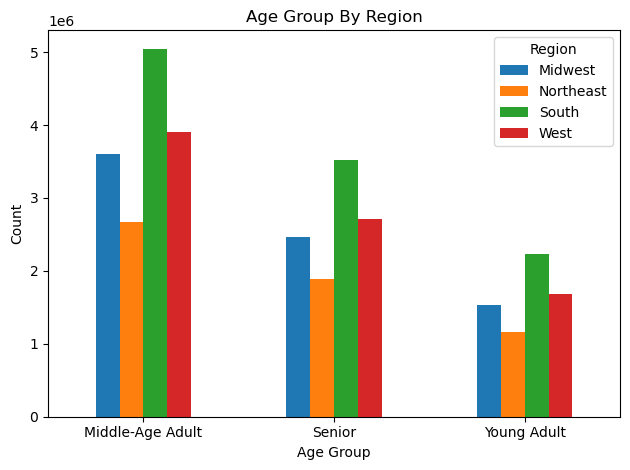

In [95]:
# Creating Bar Chart for Age Group By Region Comparison
plt.figure(figsize=(10, 7))
age_region_comparison_bar= age_region_comparison.plot(kind='bar',rot=0)
plt.title('Age Group By Region')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [96]:
# Exporting Age Group By Region Bar Chart
age_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_region_comparison_bar.png'))

In [214]:
# Creating crosstab to compare age_group profile with customer frequency type
age_customer_frequency_comparison=pd.crosstab(ords_prods_cust_merge['age_group'],ords_prods_cust_merge['customer_frequency_type'])

<Figure size 1000x700 with 0 Axes>

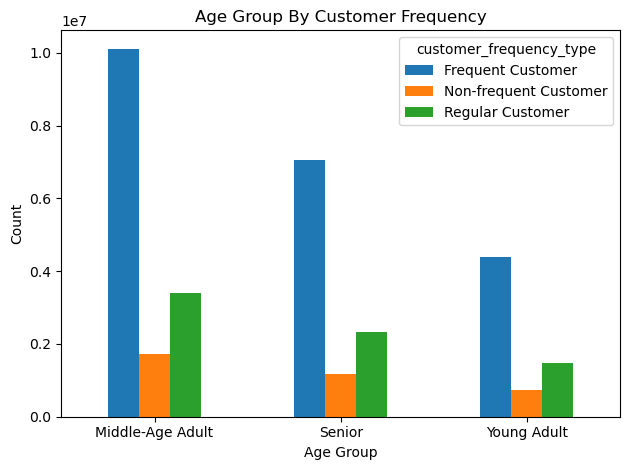

In [215]:
# Creating Bar Chart for age_group By customer frequency Comparison
plt.figure(figsize=(10, 7))
age_customer_frequency_comparison_bar= age_customer_frequency_comparison.plot(kind='bar', rot=0)
plt.title('Age Group By Customer Frequency')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [216]:
# Exporting Age Group By Customer Frequency Bar Chart
age_customer_frequency_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_customer_frequency_comparison_bar.png'))

In [100]:
# Creating Crosstab Bewtween age_group and loyalty_flag
age_group_loyalty_comparison=pd.crosstab(ords_prods_cust_merge['age_group'],ords_prods_cust_merge['loyalty_flag'],dropna=False)

<Figure size 1000x700 with 0 Axes>

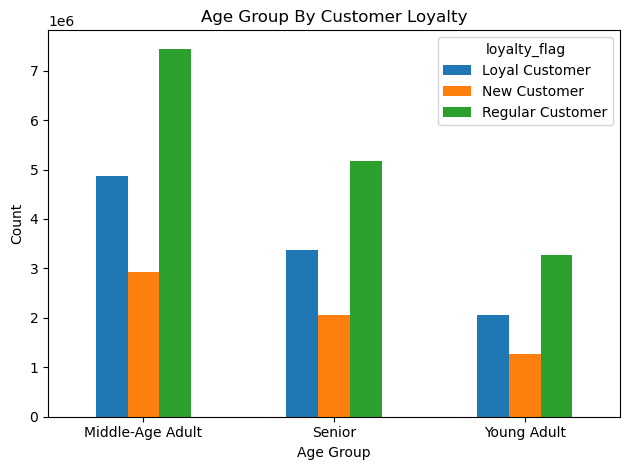

In [101]:
# Creating Bar Chart for age_group By customer loyalty
plt.figure(figsize=(10, 7))
age_group_loaylty_comparison_bar= age_group_loyalty_comparison.plot(kind='bar', rot=0)
plt.title('Age Group By Customer Loyalty')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [102]:
# Exporting age group by customer loyalty chart
age_group_loaylty_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_loaylty_comparison_bar.png'))

In [103]:
ords_prods_cust_merge['income_group'].value_counts(dropna=False)

income_group
Middle Income    17170138
High Income       7713528
Low Income        7521193
Name: count, dtype: int64

In [104]:
# Creating Crosstab Bewtween income_group and region
income_region_comparison=pd.crosstab(ords_prods_cust_merge['income_group'],ords_prods_cust_merge['region'],dropna=False)

<Figure size 1000x700 with 0 Axes>

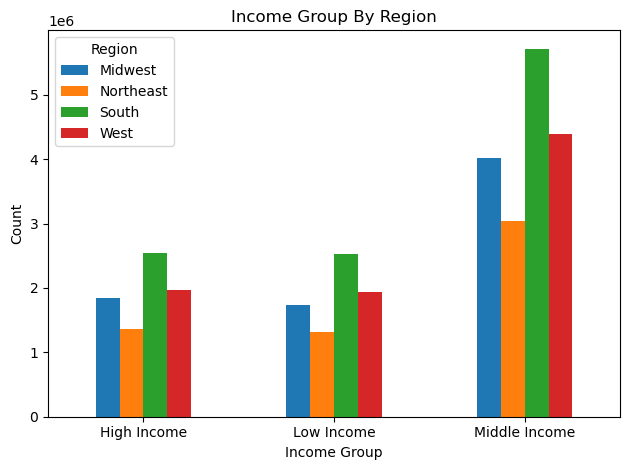

In [105]:
# Creating Bar Chart for Income Group By Region Comparison
plt.figure(figsize=(10, 7))
income_region_comparison_bar= income_region_comparison.plot(kind='bar',rot=0)
plt.title('Income Group By Region')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [106]:
# Exporting Income Region Comparison Bar Chart
income_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_region_comparison_bar.png'))

In [107]:
# Creating Crosstab for dependant_size of customers by region
dependant_size_region_comparison=pd.crosstab(ords_prods_cust_merge['dependant_size'],ords_prods_cust_merge['region'],dropna=False)

<Figure size 1000x700 with 0 Axes>

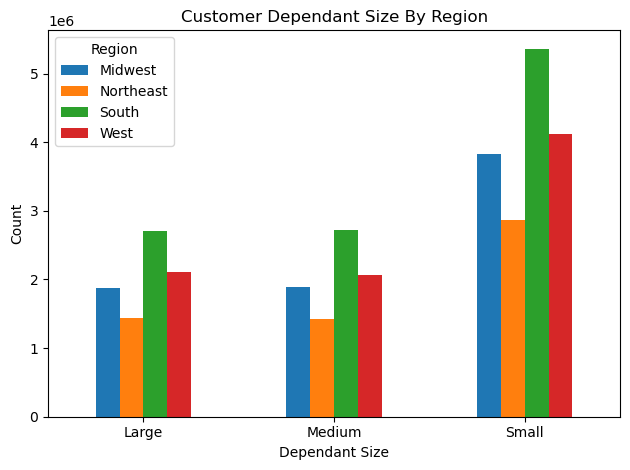

In [108]:
# Creating Bar Chart for dependant_size Group By Region Comparison
plt.figure(figsize=(10, 7))
dependant_size_region_comparison_bar= dependant_size_region_comparison.plot(kind='bar',rot=0)
plt.title('Customer Dependant Size By Region')
plt.xlabel('Dependant Size')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [109]:
# Exporting Dependant Size by Region Comparison Bar Chart
dependant_size_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependant_size_region_comparison_bar.png'))

In [110]:
# 'Creating Crosstab for Weekday Order placement by Region
week_day_category_region_comparison=pd.crosstab(ords_prods_cust_merge['week_day_category'],ords_prods_cust_merge['region'],dropna=False)

<Figure size 1000x700 with 0 Axes>

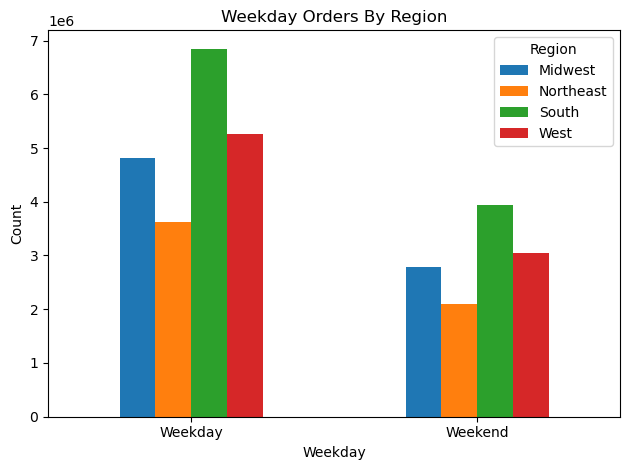

In [111]:
# Creating Bar Chart for Weekday Order Group By Region Comparison
plt.figure(figsize=(10, 7))
week_day_category_region_comparison_bar= week_day_category_region_comparison.plot(kind='bar',rot=0)
plt.title('Weekday Orders By Region')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [112]:
# Exporting Weekday Orders Placement by Region Comparison Bar Chart
week_day_category_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','week_day_category_region_comparison_bar.png'))

In [113]:
# Creating Crosstabfor Weekday Order placement by Region
order_hour_group_region_comparison=pd.crosstab(ords_prods_cust_merge['order_hour_group'],ords_prods_cust_merge['region'],dropna=False)

<Figure size 1000x700 with 0 Axes>

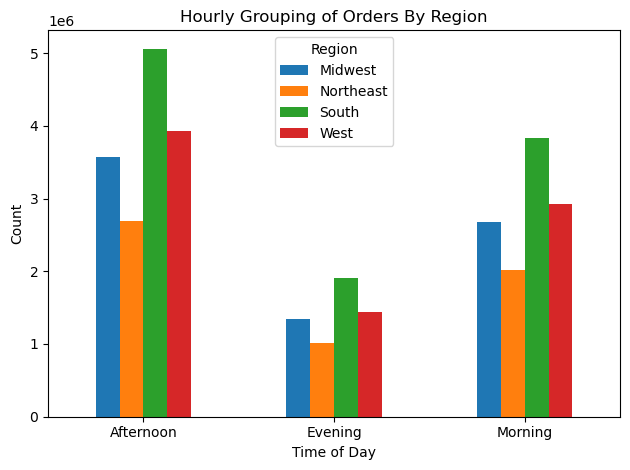

In [114]:
# Creating Bar Chart for Daily Placed Orders Hourly Grouping By Region Comparison
plt.figure(figsize=(10, 7))
order_hour_group_region_comparison_bar= order_hour_group_region_comparison.plot(kind='bar',rot=0)
plt.title('Hourly Grouping of Orders By Region')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [115]:
# Exporting Hourly Grouping of Orders By Region Comparison Bar Chart
order_hour_group_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','order_hour_group_region_comparison_bar.png'))

In [201]:
ords_prods_cust_merge['customer_frequency_type'].value_counts()

customer_frequency_type
Frequent Customer        21559853
Regular Customer          7208564
Non-frequent Customer     3636437
Name: count, dtype: int64

In [206]:
# Creating crosstab to compare region with customer frequency type
region_customer_frequency_comparison=pd.crosstab(ords_prods_cust_merge['region'],ords_prods_cust_merge['customer_frequency_type'])

<Figure size 1000x700 with 0 Axes>

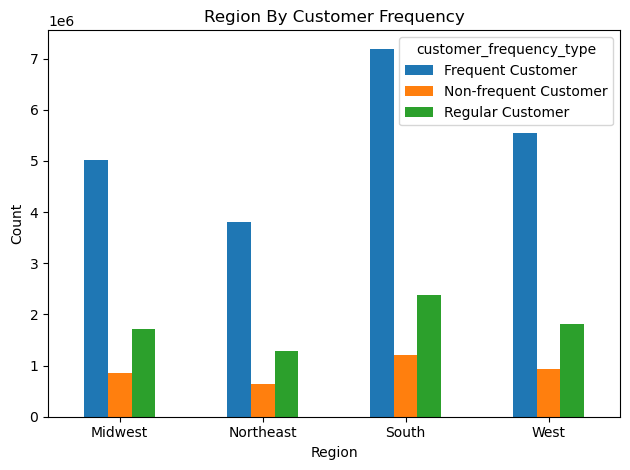

In [207]:
# Creating Bar Chart for region By customer frequency Comparison
plt.figure(figsize=(10, 7))
region_customer_frequency_comparison_bar= region_customer_frequency_comparison.plot(kind='bar', rot=0)
plt.title('Region By Customer Frequency')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [217]:
# Exporting Region by Customer Frequency Chart
region_customer_frequency_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_customer_frequency_comparison_bar.png'))

In [119]:
# Creating crosstab to compare region with type_of_spender
region_type_of_spender_comparison=pd.crosstab(ords_prods_cust_merge['region'],ords_prods_cust_merge['type_of_spender'],dropna=False)

<Figure size 0x0 with 0 Axes>

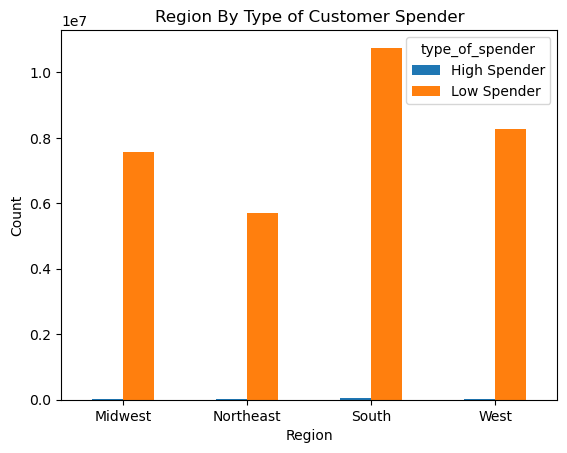

In [120]:
# Creating Bar Chart for region By type of spender
plt.figure(figsize=(0, 0))
region_type_of_spender_comparison_bar= region_type_of_spender_comparison.plot(kind='bar', rot=0)
plt.title('Region By Type of Customer Spender')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [121]:
# Exporting Bar Chart for region by type of customer spender
region_type_of_spender_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_type_of_spender_comparison_bar.png'))

In [122]:
# Creating crosstab to compare loyalty_flag with type_of_spender
loyalty_type_of_spender_comparison=pd.crosstab(ords_prods_cust_merge['loyalty_flag'],ords_prods_cust_merge['type_of_spender'],dropna=False)

<Figure size 0x0 with 0 Axes>

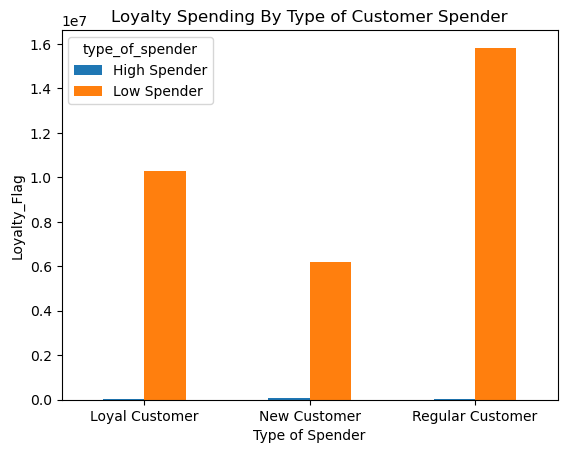

In [123]:
# Creating Bar Chart for Loyalty spending By type of spender
plt.figure(figsize=(0, 0))
loyalty_type_of_spender_comparison_bar= loyalty_type_of_spender_comparison.plot(kind='bar', rot=0)
plt.title('Loyalty Spending By Type of Customer Spender')
plt.xlabel('Type of Spender')
plt.ylabel('Loyalty_Flag')
plt.show()

In [124]:
# Exporting Loyalty spending By type of spender chart
loyalty_type_of_spender_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_type_of_spender_comparison_bar.png'))

## Profiles Compared with Departments

In [125]:
# Importing department wrangled dataframe
df_dept=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [126]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [127]:
# Renaming unnamed column
df_dept.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [128]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [129]:
df_dept.dtypes

department_id     int64
department       object
dtype: object

In [130]:
# Changing department_id from int64 to str for merge
df_dept['department_id']=df_dept['department_id'].astype(str)

In [131]:
# Dropping original merge column to merge department later
ords_prods_cust_merge=ords_prods_cust_merge.drop(columns=['_merge'])

In [132]:
ords_prods_cust_merge.columns.tolist()

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'spending_average',
 'type_of_spender',
 'user_frequency',
 'customer_frequency_type',
 'first_name',
 'last_name',
 'gender',
 'state',
 'age',
 'date_joined',
 'num_of_dependants',
 'marital_status',
 'income',
 'region',
 'customer_activity_flag',
 'age_group',
 'income_group',
 'dependant_size',
 'week_day_category',
 'order_hour_group']

In [133]:
# Merging df_dept to ords_prods_cust_merge via department_id
ords_prods_cust_dept_merge=ords_prods_cust_merge.merge(df_dept,on='department_id',indicator=True)

In [134]:
# Exporting new dataframe with deptartment merged to main dataframe
ords_prods_cust_dept_merge.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customer_department_merge.pkl'))

In [135]:
ords_prods_cust_dept_merge['department'].value_counts()

department
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

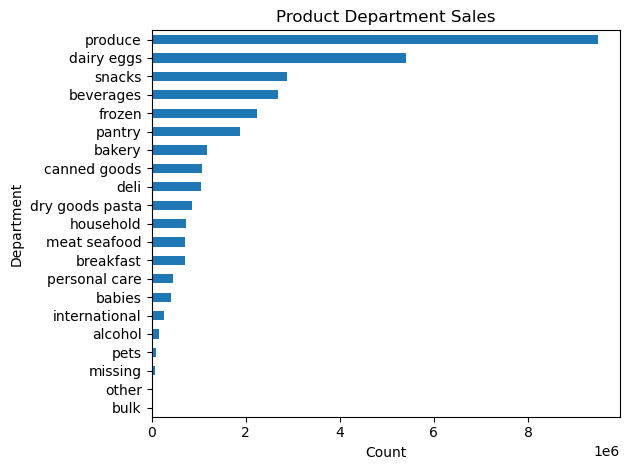

In [224]:
# Creating department bar chart
dept_bar=ords_prods_cust_dept_merge['department'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()

In [225]:
# Exporting Department Bar Chart
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_product_bar.png'))

In [138]:
# Creating crosstab to compare age_group profile with departments
age_department_comparison=pd.crosstab(ords_prods_cust_dept_merge['age_group'],ords_prods_cust_dept_merge['department'],dropna=False)

<Figure size 2500x2500 with 0 Axes>

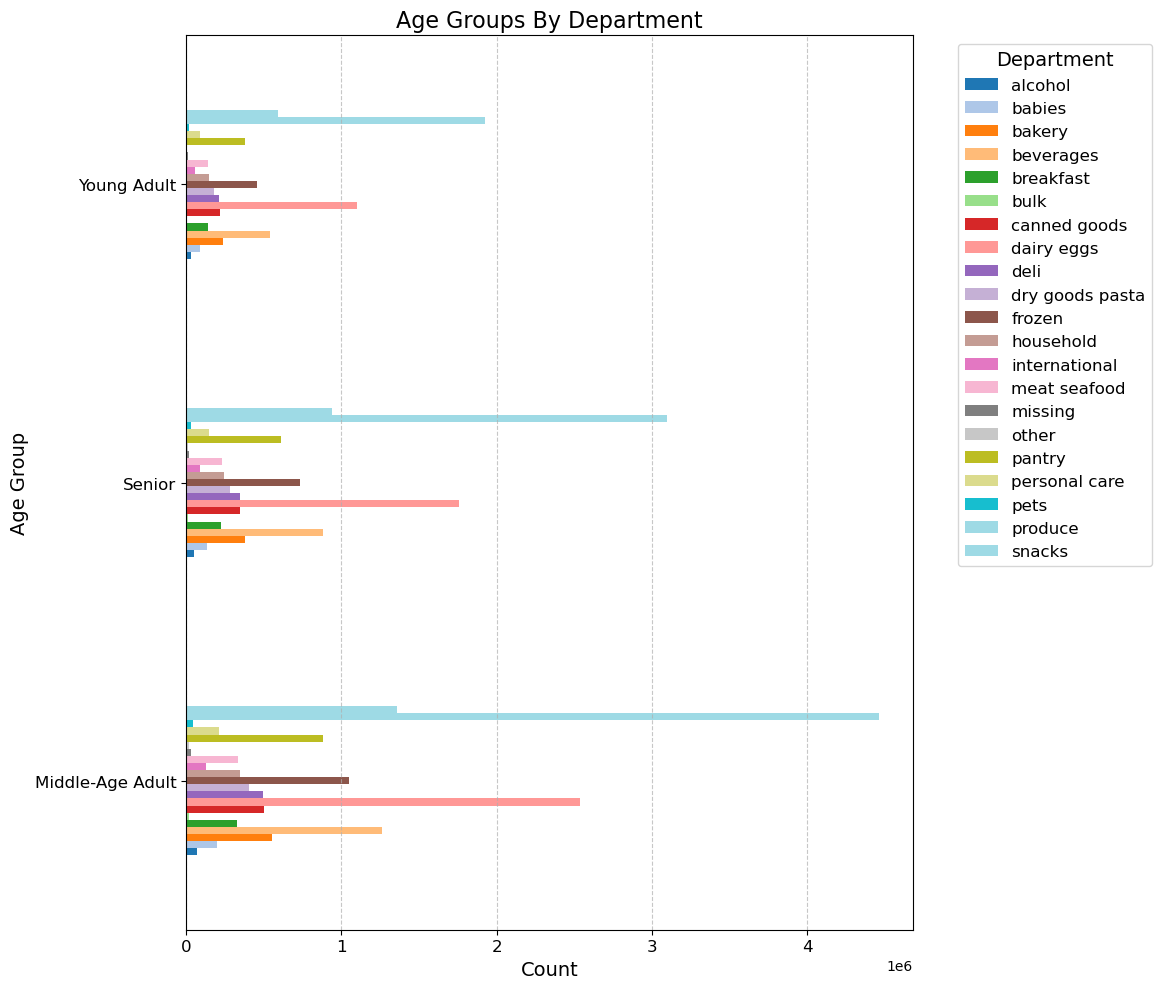

In [139]:
plt.figure(figsize=(25, 25))
age_department_comparison_bar = age_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Age Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [140]:
# Exporting Age Group by Department Bar Chart
age_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_department_comparison_bar.png'))

In [141]:
# Creating crosstab to compare income_group profile with departments
income_group_department_comparison=pd.crosstab(ords_prods_cust_dept_merge['income_group'],ords_prods_cust_dept_merge['department'],dropna=False)

<Figure size 1800x1200 with 0 Axes>

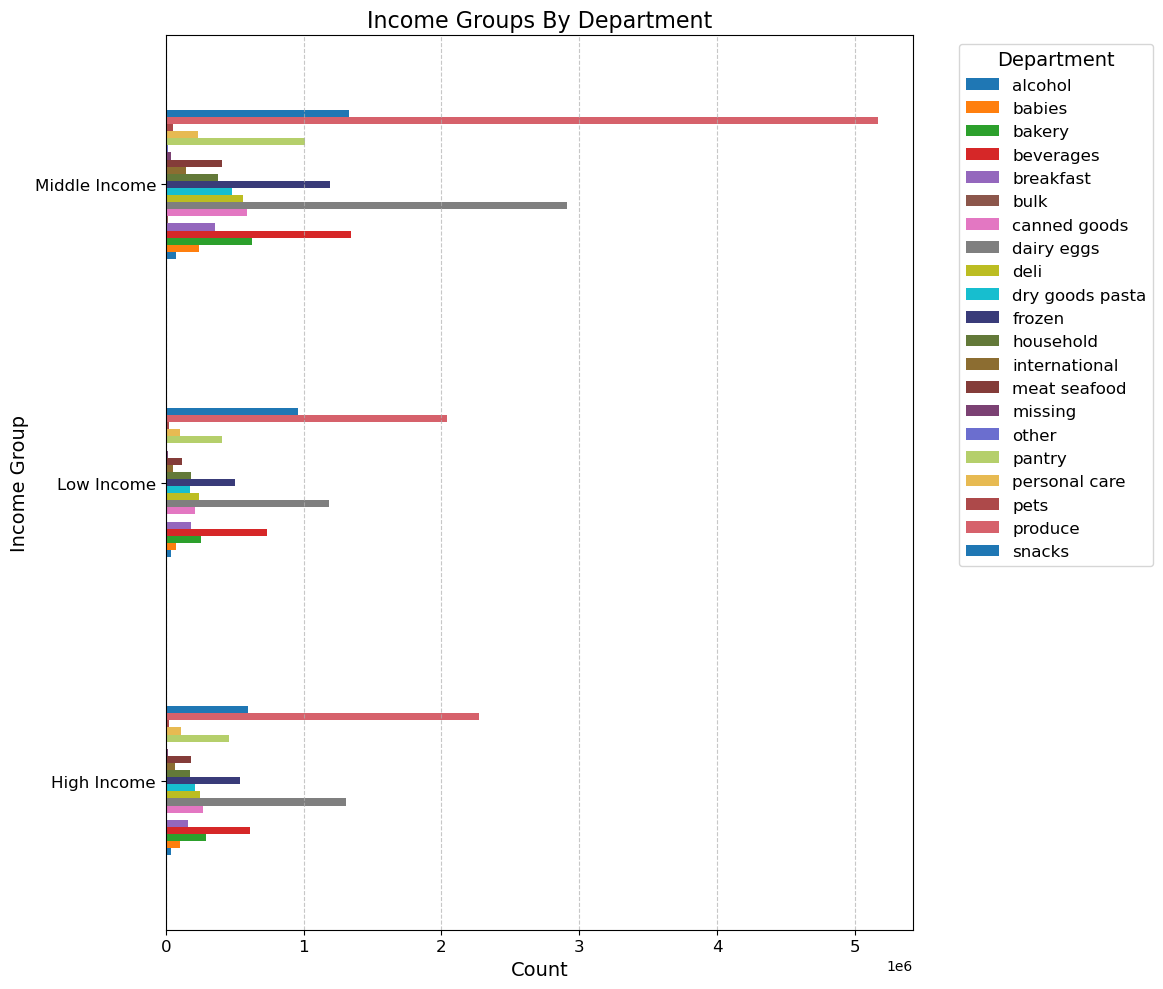

In [142]:
# Define a custom color palette with distinct colors
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#6b6ecf', '#b5cf6b', '#e7ba52', '#ad494a', '#d6616b'
]

# Create a bar chart with custom colors
plt.figure(figsize=(18, 12))
income_group_department_comparison_bar = income_group_department_comparison.plot(
    kind='barh', 
    figsize=(14, 10), 
    color=custom_colors, 
    rot=0
)

# Add title and labels with larger font size
plt.title('Income Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Income Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [143]:
# Exporting Income Groups By Department Comparison Bar Chart
income_group_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_group_department_comparison_bar.png'))

In [144]:
# Creating crosstab to compare regions with departments
region_department_comparison=pd.crosstab(ords_prods_cust_dept_merge['region'],ords_prods_cust_dept_merge['department'],dropna=False)

<Figure size 2000x2500 with 0 Axes>

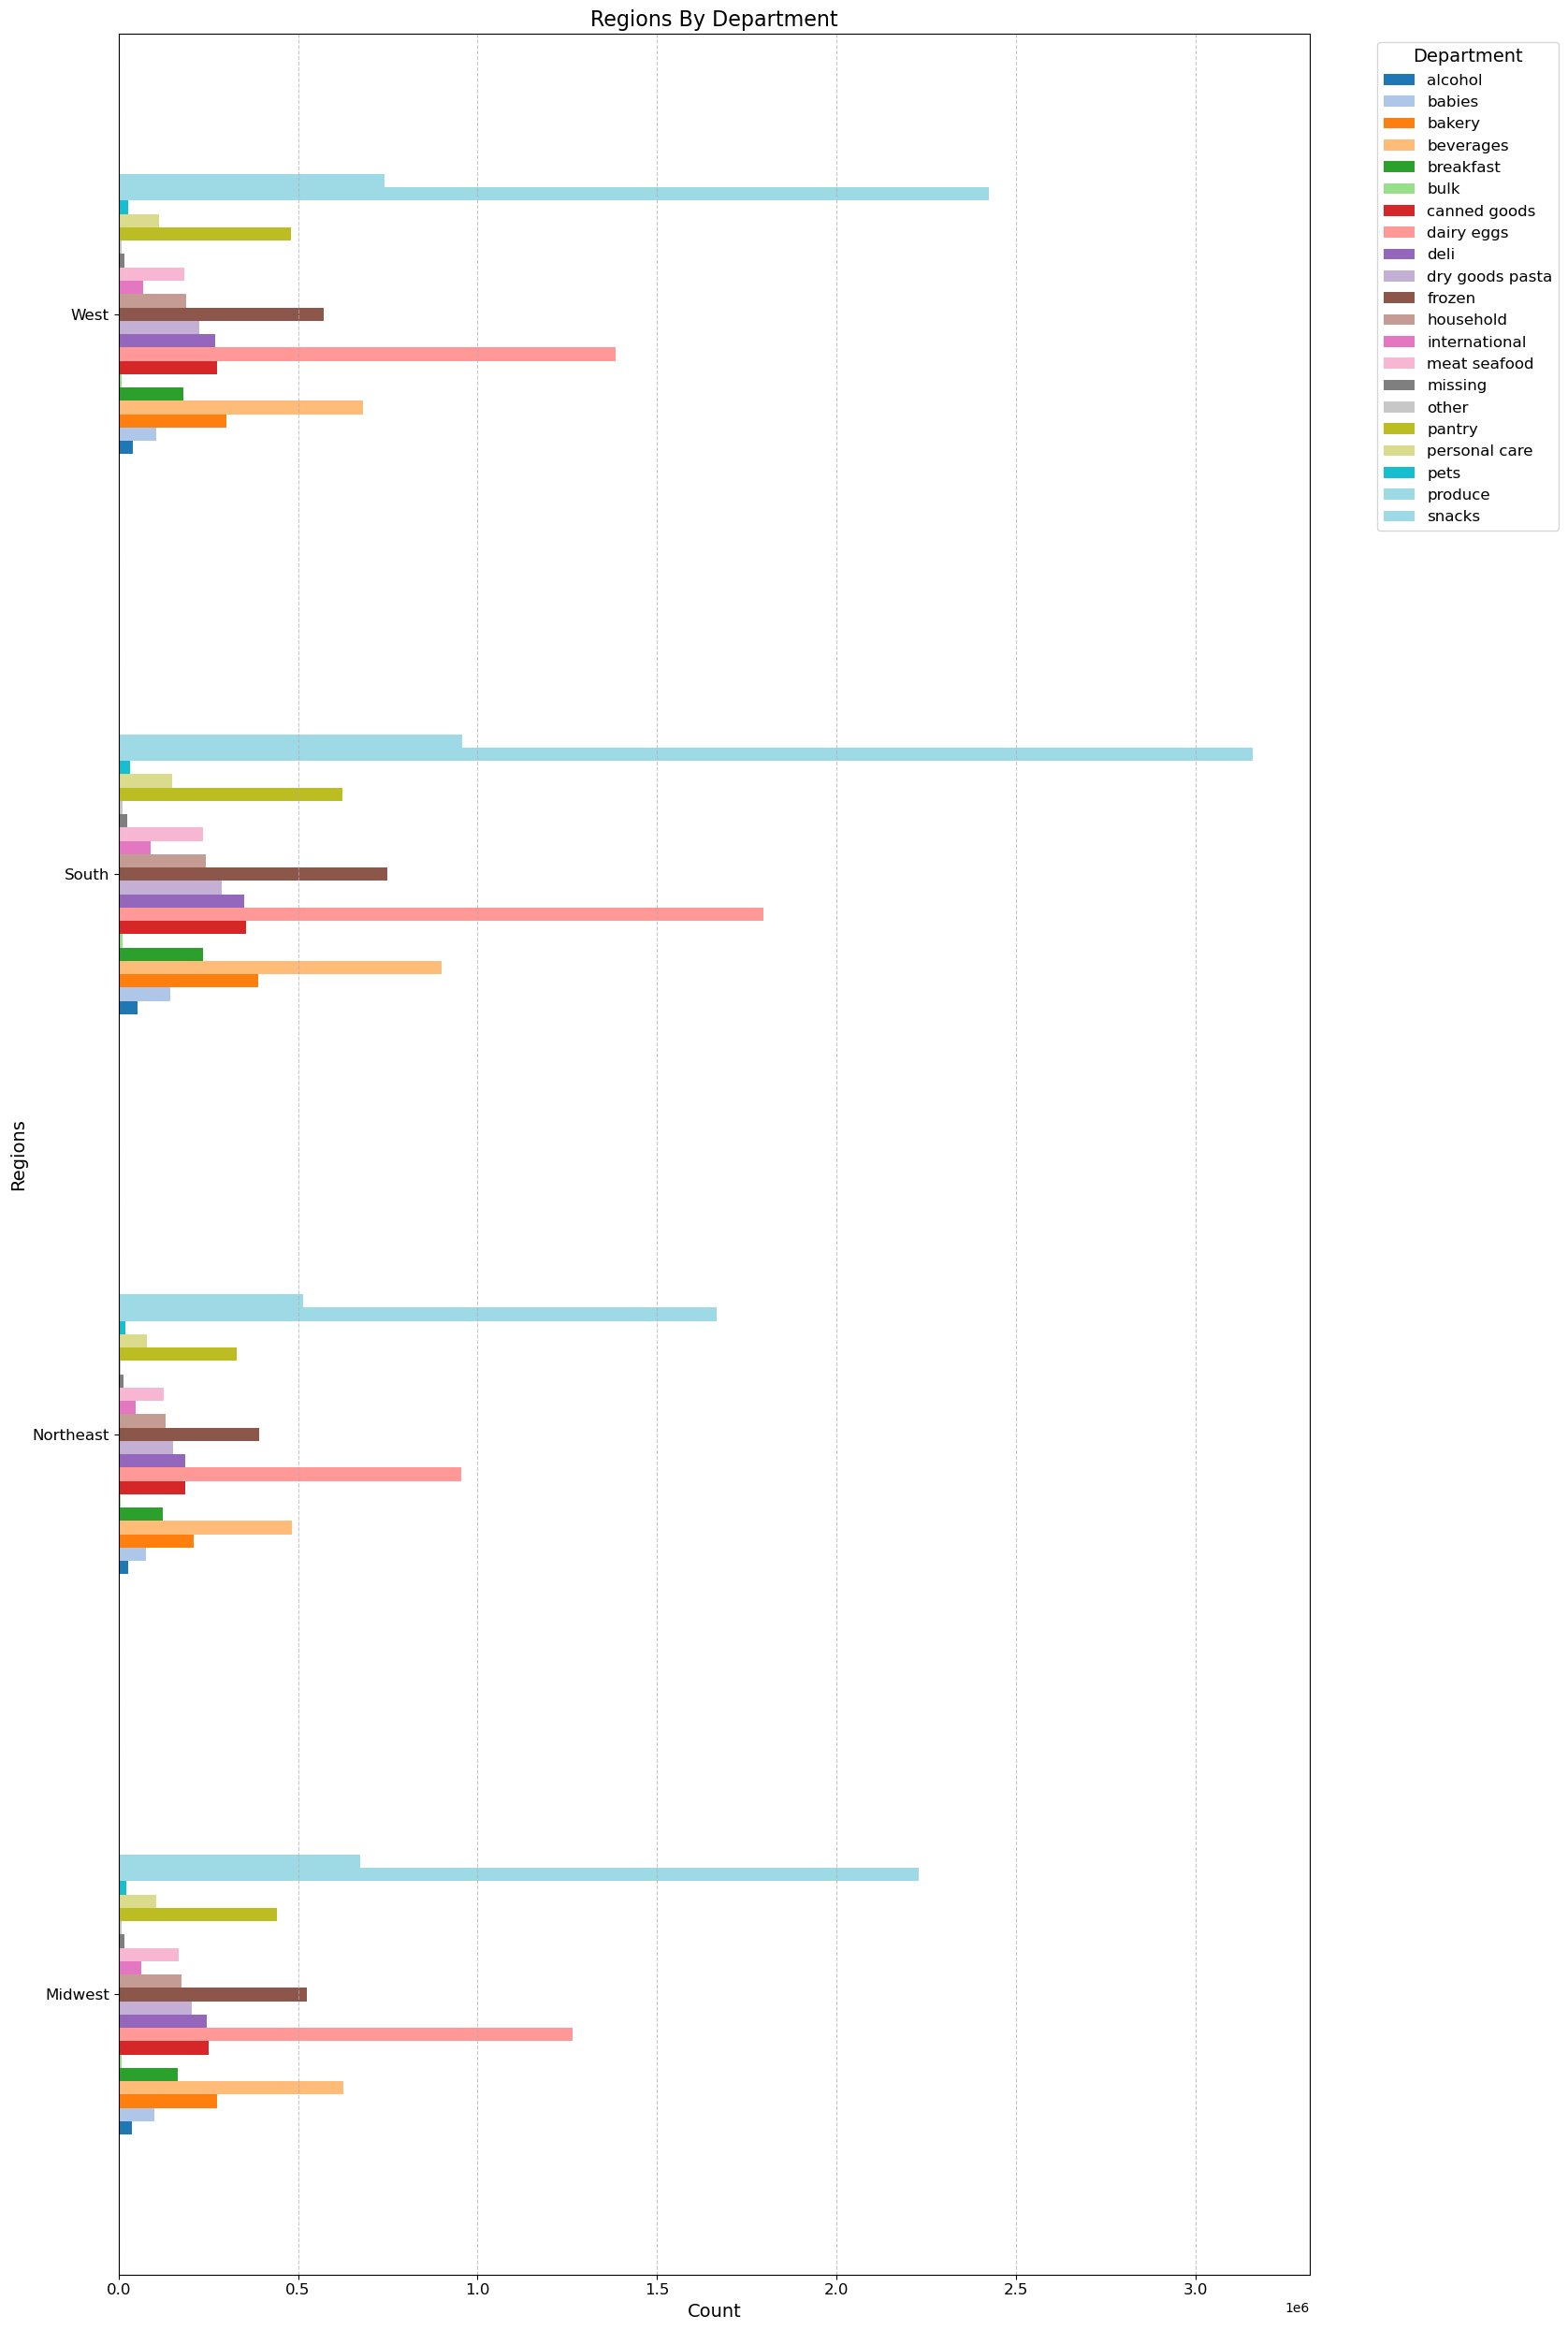

In [145]:
plt.figure(figsize=(20, 25))
region_department_comparison_bar = region_department_comparison.plot(kind='barh', figsize=(20, 25), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Regions By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Regions', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [146]:
# Exporting Regions by Department Bar Chart
region_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_department_comparison_bar.png'))

## Extra Graphs for Project Analysis

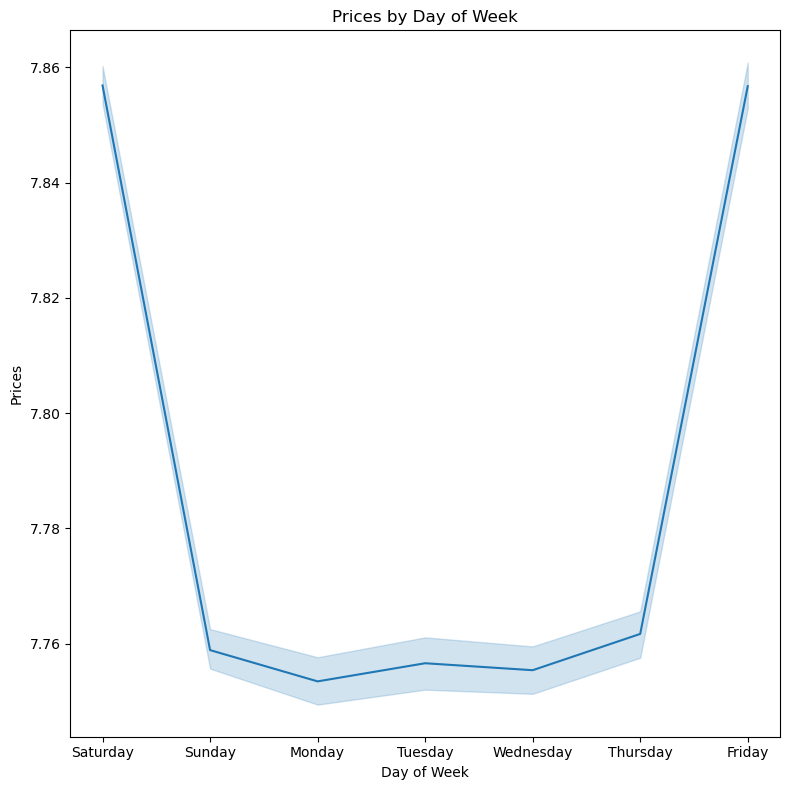

In [152]:
# Creating reference day names
day_names = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Creating Line Chart
plt.figure(figsize=(8, 8))
prices_by_day_of_week_line=sns.lineplot(data=ords_prods_cust_merge,x='orders_day_of_week',y='prices')
plt.title('Prices by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Prices')
plt.xticks(ticks=range(7), labels=[day_names[i] for i in range(7)])
plt.tight_layout()
plt.show()

In [154]:
# Exporting Prices by Day of Week Line Graph
prices_by_day_of_week_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_by_day_of_week_line.png'))

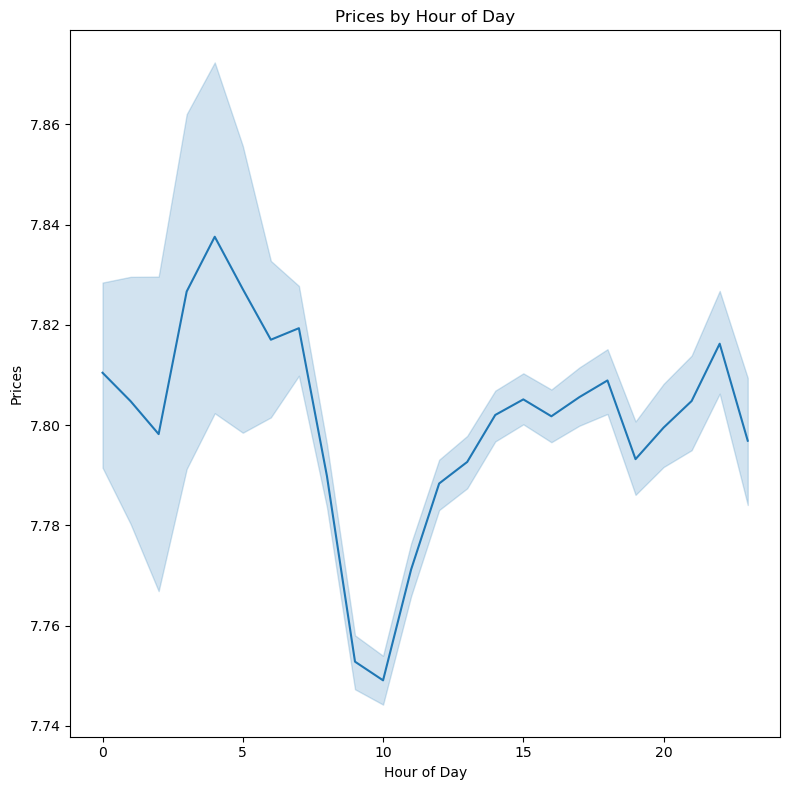

In [155]:
plt.figure(figsize=(8, 8))
prices_by_order_hour_of_day_line=sns.lineplot(data=ords_prods_cust_merge,x='order_hour_of_day',y='prices')
plt.title('Prices by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Prices')
plt.tight_layout()
plt.show()

In [156]:
# Exporting Prices by Hour of Day
prices_by_order_hour_of_day_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_by_order_hour_of_day_line.png'))

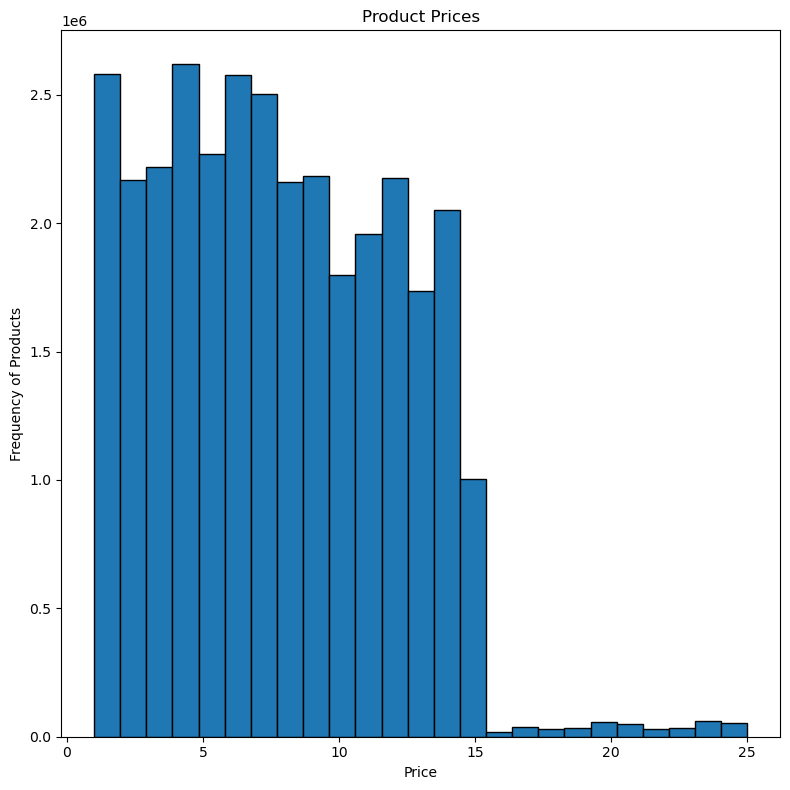

In [172]:
# Histogram of product prices
plt.figure(figsize=(8, 8))
prod_price_hist=ords_prods_cust_merge['prices'].plot.hist(bins=25,edgecolor='black')
plt.title('Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency of Products')
plt.tight_layout()
plt.show()

In [173]:
# Exporting Product Pricing Histogram
prod_price_hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prod_price_hist.png'))

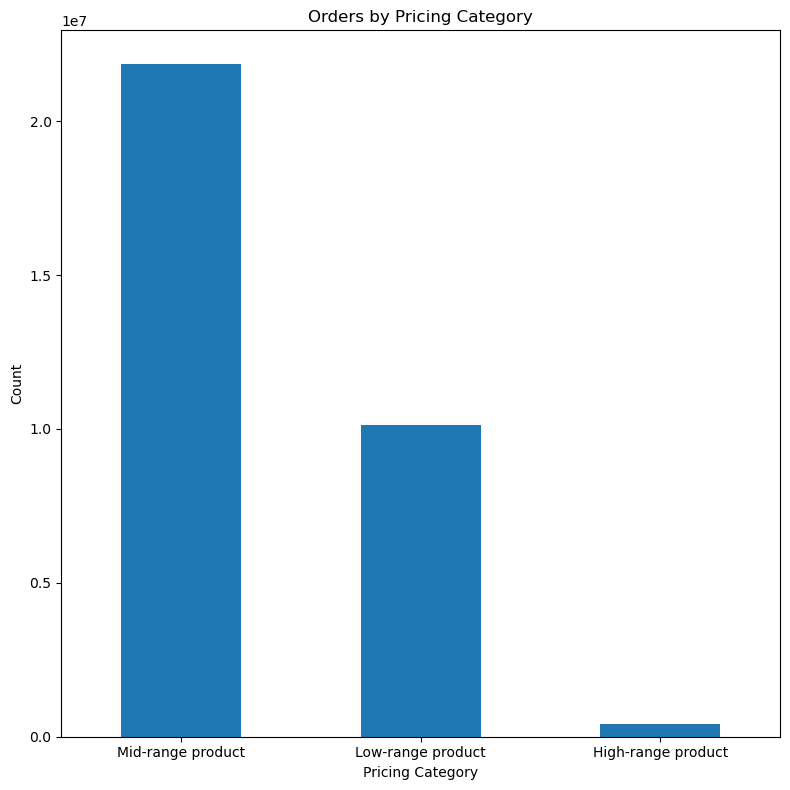

In [178]:
# Creating bar chart for price category
plt.figure(figsize=(8,8))
price_category_bar= ords_prods_cust_merge['price_range_loc'].value_counts().plot(kind='bar', rot=0)
plt.title('Orders by Pricing Category')
plt.xlabel('Pricing Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [179]:
# Exporting Pricing Category Bar Chart comparison
price_category_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','price_category_bar.png'))

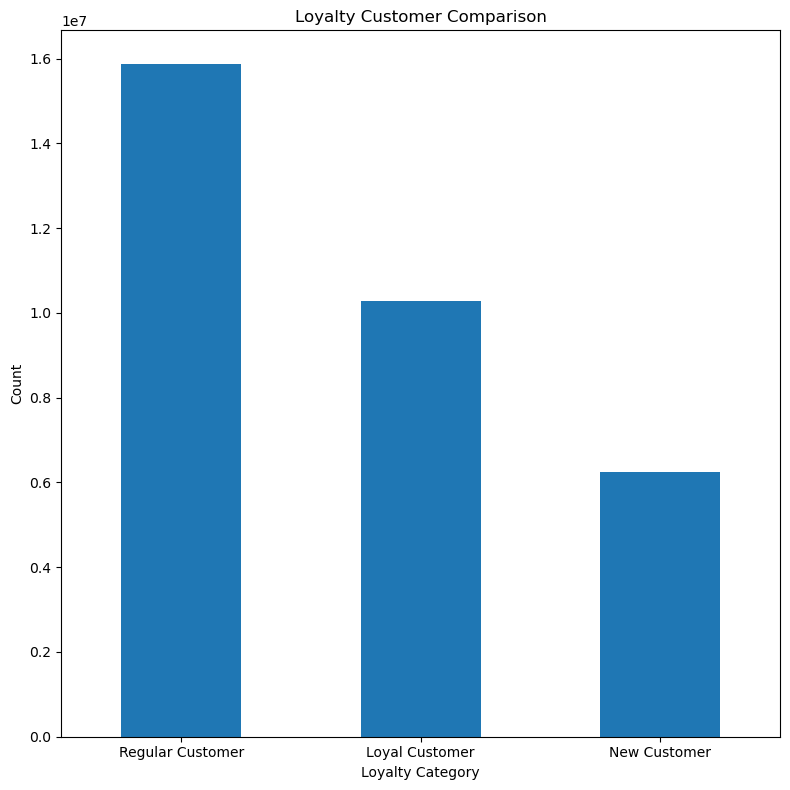

In [184]:
# Creating bar chart for customer loyalty breakdown
plt.figure(figsize=(8,8))
loyalty_customer_comparison_bar= ords_prods_cust_merge['loyalty_flag'].value_counts().plot(kind='bar', rot=0)
plt.title('Loyalty Customer Comparison')
plt.xlabel('Loyalty Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [181]:
# Exporting Loyalty Customer Comparison Bar Chart
loyalty_customer_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_customer_comparison_bar.png'))

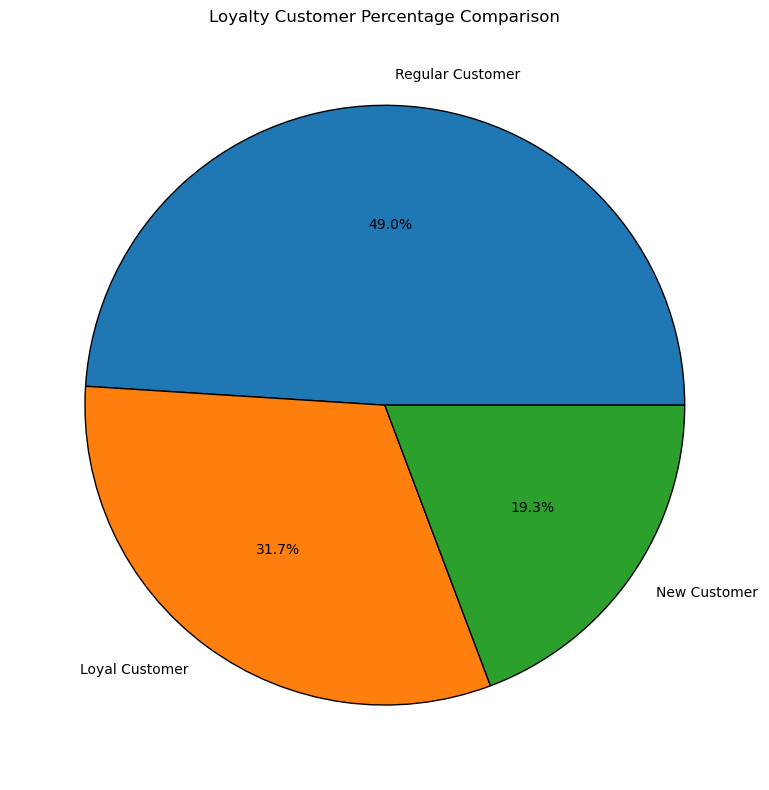

In [183]:
# Creating Pie Chart of customer loyalty breakdown
loyalty_customer_pie= ords_prods_cust_merge['loyalty_flag'].value_counts()
plt.figure(figsize=(8,8))
loyalty_customer_comparison_pie=loyalty_customer_pie.plot.pie(autopct='%.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Loyalty Customer Percentage Comparison')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [185]:
loyalty_customer_comparison_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_customer_comparison_pie.png'))

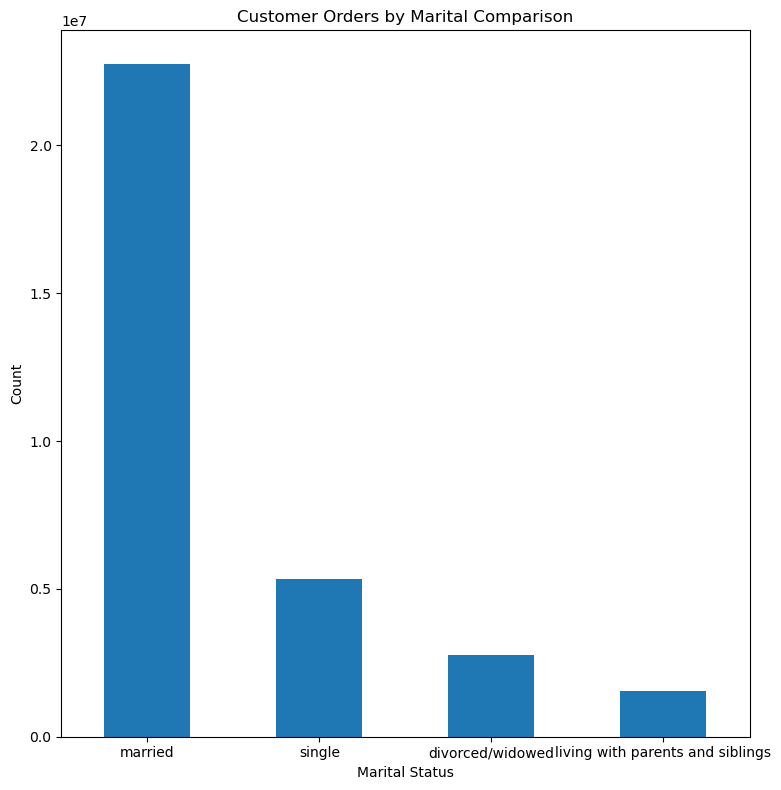

In [218]:
# Creating bar chart for customer marital status breakdown
plt.figure(figsize=(8,8))
marital_status_comparison_bar= ords_prods_cust_merge['marital_status'].value_counts().plot(kind='bar', rot=0)
plt.title('Customer Orders by Marital Comparison')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [219]:
# Export bar chart of customer marital status orders
marital_status_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','marital_status_comparison_bar.png'))

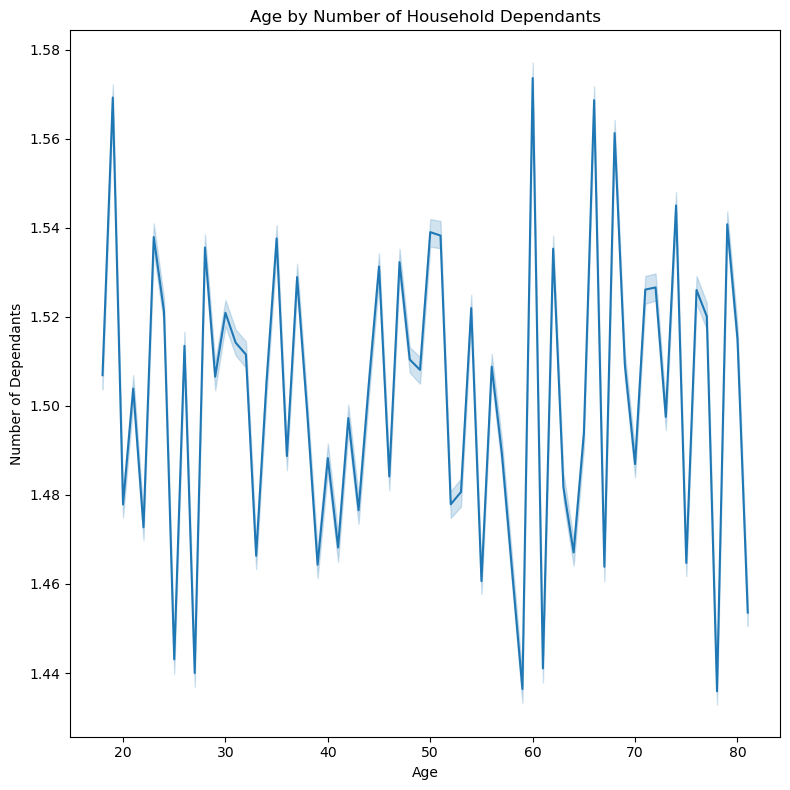

In [227]:
# Creating Line Chart age by num_of_dependants comparison
plt.figure(figsize=(8, 8))
age_by_dependants_line=sns.lineplot(data=ords_prods_cust_merge,x='age',y='num_of_dependants')
plt.title('Age by Number of Household Dependants')
plt.xlabel('Age')
plt.ylabel('Number of Dependants')
plt.tight_layout()
plt.show()

In [229]:
# Exporting line chart age by num_of_dependants comparison
age_by_dependants_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_by_dependants_line.png'))

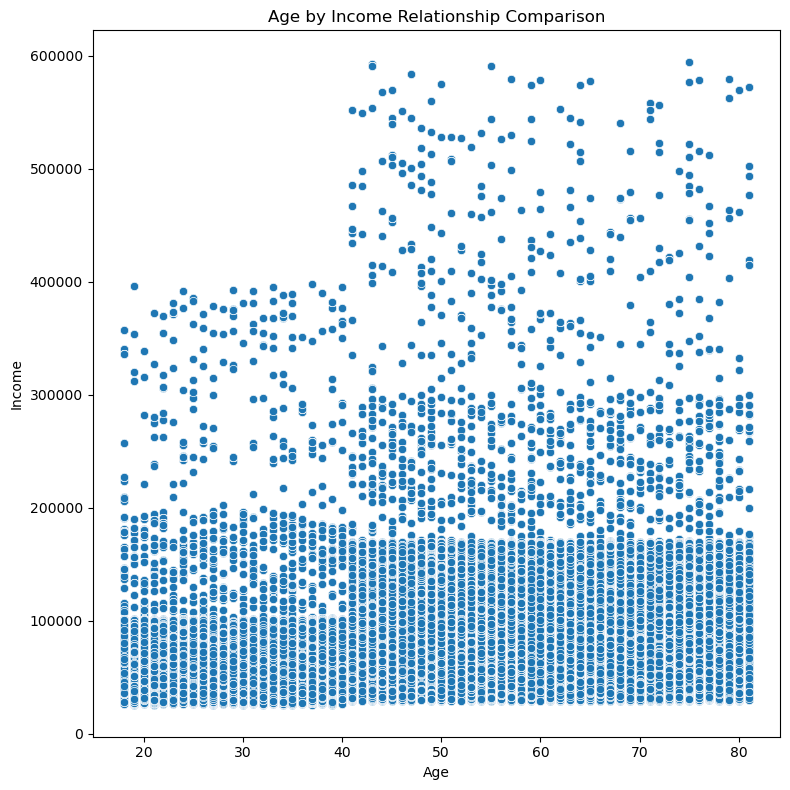

In [230]:
# Creating scatterplot for age by income comparison
plt.figure(figsize=(8, 8))
age_income_comparison_scat=sns.scatterplot(x = 'age', y = 'income',data = ords_prods_cust_merge)
plt.title('Age by Income Relationship Comparison')
plt.xlabel('Age')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

In [231]:
# Exporting scatterplot age by income comparison
age_income_comparison_scat.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_income_comparison_scat.png'))